In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
filename = "C:\\dev\\dnase_elevation\\average_pk.txt"
filename2 = "C:\\dev\\dnase_elevation\\average_pk.inmemory.txt"
# filename = "C:\\dev\\dnase_elevation\\k562_pk.txt"

df = pd.read_csv(filename, delimiter="\t")
df2 = pd.read_csv(filename2, delimiter="\t")

In [ ]:
# compare the two.
assert df['chrom'].unique() == df['chrom'].unique()

In [5]:
chromosomes = df['chrom'].unique()
values = np.sort(df['signalValue'].values)
print values.shape
print(values.min(), values.max(), values.mean(), np.median(values))

(11901583L,)
(0.0105263157895, 31685.094736799998, 9.2468084853657189, 1.1578947368400001)


(array([ 5441689.,  1580745.,   851404.,   552065.,   404472.,   311605.,
          246859.,   204184.,   172667.,   147681.]),
 array([ 0.01052632,  0.93368421,  1.85684211,  2.78      ,  3.70315789,
         4.62631579,  5.54947368,  6.47263158,  7.39578947,  8.31894737,
         9.24210526]),
 <a list of 10 Patch objects>)

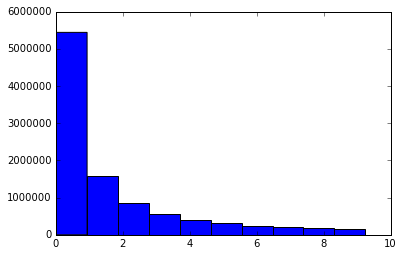

In [49]:
plt.hist(values[values < values.mean()])
# plt.hist(values)

In [50]:
# just look at relevant chromosomes
relevant_chroms = ["chr%d" % i for i in range(1, 23)]
for i in relevant_chroms:
    if i not in chromosomes:
        print i

In [51]:
for chrom in relevant_chroms:
    chrom_df = df[df['chrom'] == chrom]
    coverage = np.sum(chrom_df['chromEnd'] - chrom_df['chromStart'])
    total = chrom_df['chromEnd'].max() - chrom_df['chromStart'].min()
    values = np.sort(chrom_df['signalValue'].values)
    # print "chrom", chrom_df['chromStart'].min(), chrom_df['chromEnd'].max()
    # print chrom, coverage, total, float(coverage)/total*100
    print chrom, float(coverage)/total*100, values.min(), values.max(), values.mean(), np.median(values)

chr1 17.4609961574 0.0210526315789 31685.0947368 9.7989507323 1.18947368421
chr2 16.4677629368 0.0105263157895 3661.36842105 8.60120811608 1.12631578947
chr3 16.4772961471 0.0210526315789 1536.4 8.72612260728 1.12631578947
chr4 13.5225422328 0.0210526315789 1234.28421053 7.42502080542 1.03157894737
chr5 15.2670894182 0.0210526315789 2792.86315789 8.63722375206 1.13684210526
chr6 16.9740531683 0.0210526315789 1266.28421053 9.11301752987 1.18947368421
chr7 16.2153242823 0.0210526315789 1392.85263158 8.52735198747 1.06315789474
chr8 16.165475107 0.0210526315789 1297.01052632 8.39960392096 1.11578947368
chr9 14.3202722157 0.0210526315789 1178.44210526 9.09162934134 1.21052631579
chr10 16.8403511929 0.0210526315789 1567.18947368 8.86296300367 1.16842105263
chr11 17.0061046001 0.0210526315789 1339.18947368 9.76302185054 1.16842105263
chr12 17.3540501309 0.0210526315789 1328.13684211 9.62209895544 1.18947368421
chr13 14.3443237855 0.0210526315789 1238.86315789 7.56904224317 1.04210526316
chr1

chr1 43466770 248936370 17.4609961574


(array([ 519518.,  145571.,   78354.,   51876.,   37486.,   28459.,
          23143.,   18700.,   15668.,   13581.]),
 array([ 0.02105263,  0.99789474,  1.97473684,  2.95157895,  3.92842105,
         4.90526316,  5.88210526,  6.85894737,  7.83578947,  8.81263158,
         9.78947368]),
 <a list of 10 Patch objects>)

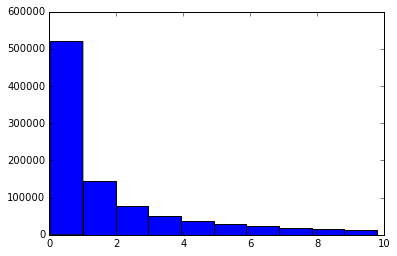

In [53]:
chrom = "chr1"
chrom_df = df[df['chrom'] == chrom]
coverage = np.sum(chrom_df['chromEnd'] - chrom_df['chromStart'])
total = chrom_df['chromEnd'].max() - chrom_df['chromStart'].min()
print chrom, coverage, total, float(coverage)/total*100
# print "chrom", chrom_df['chromStart'].min(), chrom_df['chromEnd'].max()
chrom_values = chrom_df['signalValue']
chrom_values = chrom_values[chrom_values < chrom_values.mean()]
plt.hist(chrom_values)